<a href="https://colab.research.google.com/github/LeonardoZavala03/C-IA-Ago-Dic2024/blob/Actividades/RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNP Leonardo Lancelot Zavala Moreno #1957936
N4

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [3]:
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Sies', 'Siete', 'Ocho', 'Nueve']

In [12]:
x_train.shape

(60000, 28, 28)

(60000, 28, 28)

In [13]:
len(y_train)

60000

60000

In [15]:
x_test.shape

(10000, 28, 28)

(10000, 28, 28)

In [16]:
len(y_test)

10000

10000

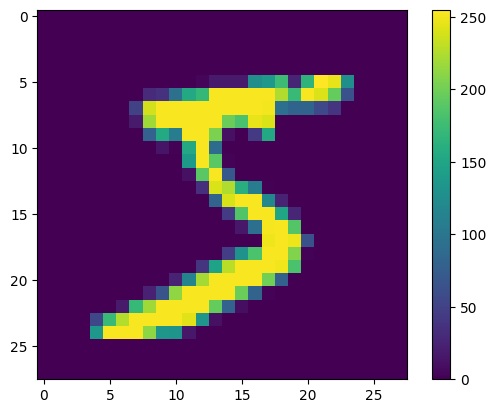

In [17]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = x_train / 255.0

test_images = x_test / 255.0

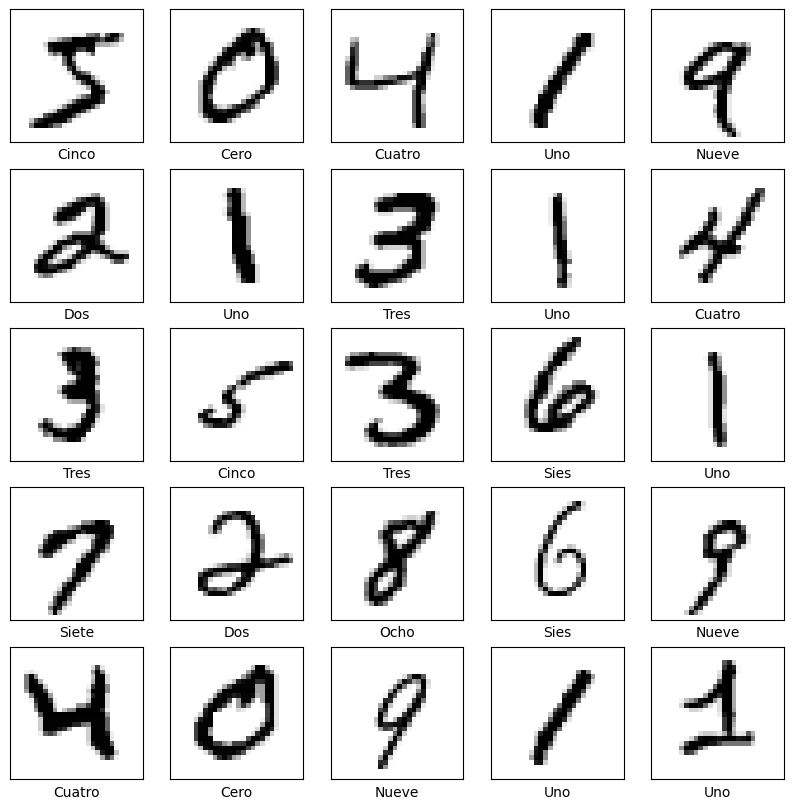

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8212 - loss: 7.3678
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9102 - loss: 0.3915
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9299 - loss: 0.2878
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9377 - loss: 0.2431
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9451 - loss: 0.2204
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9488 - loss: 0.2036
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9485 - loss: 0.2029
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9522 - loss: 0.1921
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9542 - loss: 0.1801
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9566 - loss: 0.1777


In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 5ms/step - accuracy: 0.9398 - loss: 0.3066

Test accuracy: 0.9398000240325928


In [25]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
predictions[0]

array([5.2295892e-09, 5.0265074e-04, 1.1522194e-03, 1.1876128e-05,
       2.1391825e-08, 2.8951606e-14, 1.3969699e-18, 9.9832898e-01,
       3.6466433e-06, 5.4184119e-07], dtype=float32)

In [32]:
np.argmax(predictions[0])


7

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

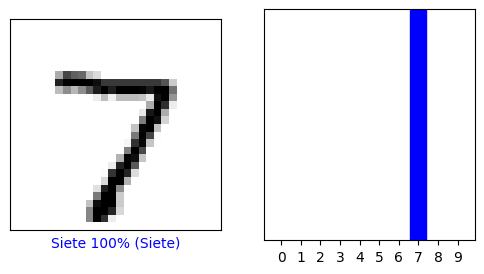

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

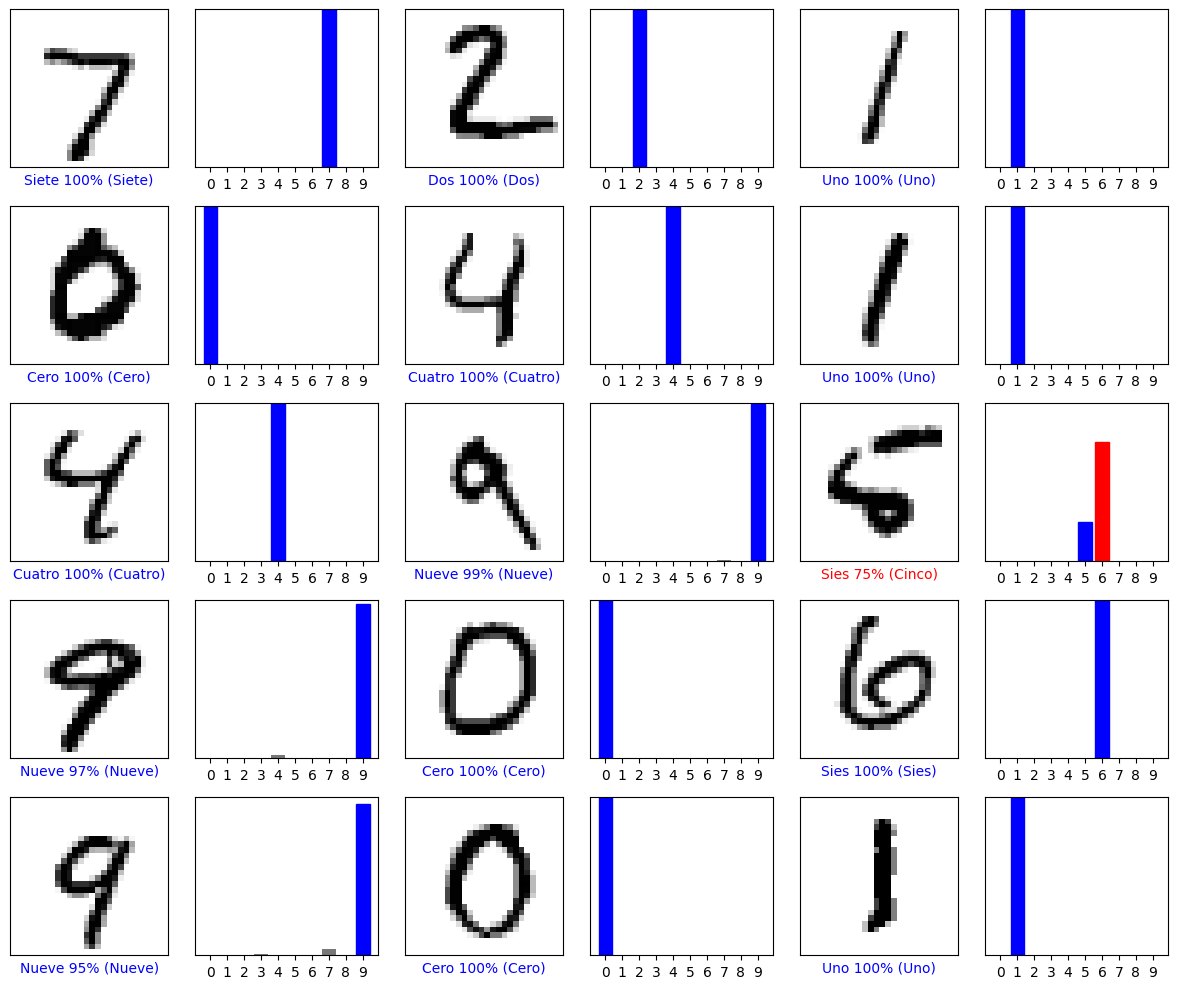

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [36]:
img = x_test[1]

print(img.shape)

(28, 28)

(28, 28)


(28, 28)

In [37]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[5.7702876e-26 1.6044227e-13 1.0000000e+00 6.9750505e-10 1.7658816e-21
  2.2503702e-14 6.2713960e-14 9.3982478e-32 1.9548283e-17 0.0000000e+00]]


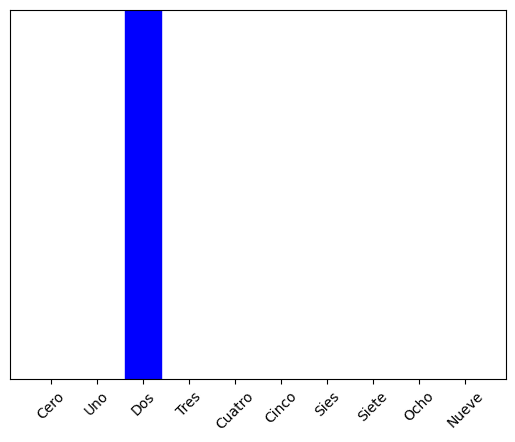

In [41]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [42]:
np.argmax(predictions_single[0])

2

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[2.4764149e-20 6.9110061e-33 1.3151448e-11 8.7861706e-16 7.6917930e-14
  1.2593921e-07 9.9999988e-01 1.9098338e-34 3.6764195e-18 0.0000000e+00]]


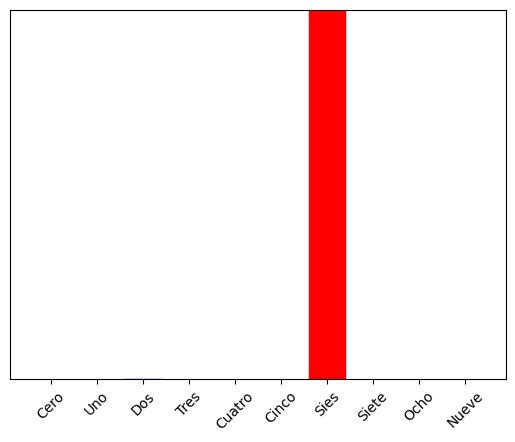

In [46]:
img = x_test[-1]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[7.1040345e-20 9.9999487e-01 2.6429294e-08 1.3376586e-19 2.5136626e-06
  5.7118316e-10 6.5209521e-10 1.9786946e-06 5.3867370e-07 9.8396974e-08]]


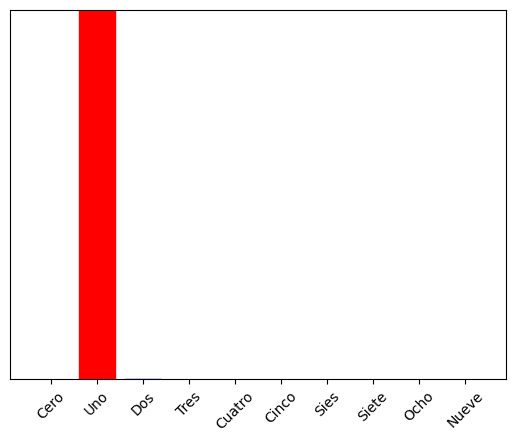

In [50]:
img = x_test[5]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.00000000e+00 1.08796816e-16 3.92583227e-19 1.00000000e+00
  0.00000000e+00 2.88335516e-18 0.00000000e+00 3.53724757e-20
  2.32590954e-25 9.81203575e-33]]


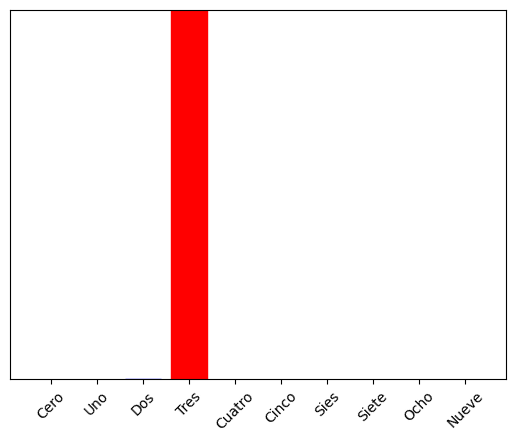

In [52]:
img = x_test[500]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[4.4687205e-12 1.2955207e-19 1.9439511e-07 1.4909261e-10 1.4509834e-08
  6.8578192e-05 9.9993122e-01 1.2205388e-20 6.6908416e-11 2.2661199e-23]]


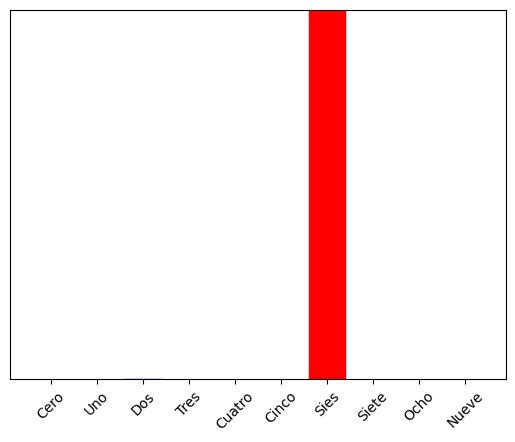

In [51]:
img = x_test[600]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)